In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 # Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
 # Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []


# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
 # Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [8]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(0.5)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | muros
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | klerksdorp
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | madang
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | kuching
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | kasempa
Processing Record 20 of Set 1 | port-cartier
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | avera
Processing Record 23 of Set 1 | hit

Processing Record 36 of Set 4 | tiksi
Processing Record 37 of Set 4 | bredasdorp
Processing Record 38 of Set 4 | laguna
Processing Record 39 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | pitea
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | zhenlai
Processing Record 44 of Set 4 | aquiraz
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | ouadda
Processing Record 47 of Set 4 | baykit
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | margate
Processing Record 50 of Set 4 | san rafael
Processing Record 1 of Set 5 | sao mateus
Processing Record 2 of Set 5 | merrill
Processing Record 3 of Set 5 | toamasina
Processing Record 4 of Set 5 | egvekinot
Processing Record 5 of Set 5 | tahta
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | sakakah
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record

Processing Record 26 of Set 8 | krasnoselkup
Processing Record 27 of Set 8 | ketchikan
Processing Record 28 of Set 8 | fairbanks
Processing Record 29 of Set 8 | haines junction
Processing Record 30 of Set 8 | luderitz
Processing Record 31 of Set 8 | banjarmasin
Processing Record 32 of Set 8 | kaeo
Processing Record 33 of Set 8 | corrente
Processing Record 34 of Set 8 | atar
Processing Record 35 of Set 8 | russell
Processing Record 36 of Set 8 | asha
Processing Record 37 of Set 8 | salmon arm
Processing Record 38 of Set 8 | cairns
Processing Record 39 of Set 8 | klaksvik
Processing Record 40 of Set 8 | manali
Processing Record 41 of Set 8 | qinzhou
Processing Record 42 of Set 8 | lucapa
Processing Record 43 of Set 8 | broome
Processing Record 44 of Set 8 | roald
Processing Record 45 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 8 | cherusti
Processing Record 47 of Set 8 | port-de-paix
City not found. Skipping...
Processing Record 48 of Set 8 | naze
Processin

Processing Record 12 of Set 12 | fayaoue
Processing Record 13 of Set 12 | arara
Processing Record 14 of Set 12 | la ronge
Processing Record 15 of Set 12 | fernley
Processing Record 16 of Set 12 | guerrero negro
Processing Record 17 of Set 12 | caravelas
Processing Record 18 of Set 12 | pitimbu
Processing Record 19 of Set 12 | oga
Processing Record 20 of Set 12 | port charlotte
Processing Record 21 of Set 12 | villa nueva
Processing Record 22 of Set 12 | pierre
Processing Record 23 of Set 12 | ozgon
City not found. Skipping...
Processing Record 24 of Set 12 | ondjiva
Processing Record 25 of Set 12 | pirgos
Processing Record 26 of Set 12 | yaritagua
Processing Record 27 of Set 12 | sao filipe
Processing Record 28 of Set 12 | kayes
Processing Record 29 of Set 12 | airai
Processing Record 30 of Set 12 | warmbad
Processing Record 31 of Set 12 | zhezkazgan
Processing Record 32 of Set 12 | zhigansk
Processing Record 33 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 34 of S

In [9]:
len(city_data)

571

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,52.09,91,100,14.56,CL,2022-05-10 05:02:15
1,Butaritari,3.0707,172.7902,81.50,76,41,17.02,KI,2022-05-10 05:02:26
2,Muros,42.7762,-9.0603,56.01,84,93,6.49,ES,2022-05-10 05:02:27
3,Punta Arenas,-53.1500,-70.9167,37.11,86,6,5.50,CL,2022-05-10 05:02:07
4,Bilibino,68.0546,166.4372,33.84,91,19,3.09,RU,2022-05-10 05:02:27
5,Klerksdorp,-26.8521,26.6667,48.43,63,0,1.74,ZA,2022-05-10 05:02:27
6,Thompson,55.7435,-97.8558,49.19,91,100,5.75,CA,2022-05-10 05:00:31
7,Madang,-5.2246,145.7966,86.34,67,44,6.31,PG,2022-05-10 05:02:28
8,Upernavik,72.7868,-56.1549,24.80,97,100,3.69,GL,2022-05-10 05:02:28
9,Mataura,-46.1927,168.8643,51.48,81,44,1.66,NZ,2022-05-10 05:02:29


In [11]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-05-10 05:02:15,-37.6167,-73.6500,52.09,91,100,14.56
1,Butaritari,KI,2022-05-10 05:02:26,3.0707,172.7902,81.50,76,41,17.02
2,Muros,ES,2022-05-10 05:02:27,42.7762,-9.0603,56.01,84,93,6.49
3,Punta Arenas,CL,2022-05-10 05:02:07,-53.1500,-70.9167,37.11,86,6,5.50
4,Bilibino,RU,2022-05-10 05:02:27,68.0546,166.4372,33.84,91,19,3.09
5,Klerksdorp,ZA,2022-05-10 05:02:27,-26.8521,26.6667,48.43,63,0,1.74
6,Thompson,CA,2022-05-10 05:00:31,55.7435,-97.8558,49.19,91,100,5.75
7,Madang,PG,2022-05-10 05:02:28,-5.2246,145.7966,86.34,67,44,6.31
8,Upernavik,GL,2022-05-10 05:02:28,72.7868,-56.1549,24.80,97,100,3.69
9,Mataura,NZ,2022-05-10 05:02:29,-46.1927,168.8643,51.48,81,44,1.66


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

City          571
Country       571
Date          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
dtype: int64

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

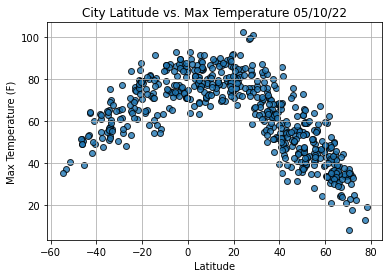

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

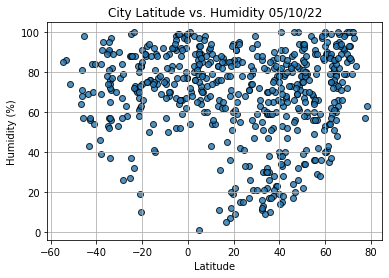

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

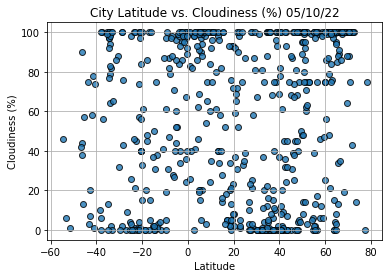

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

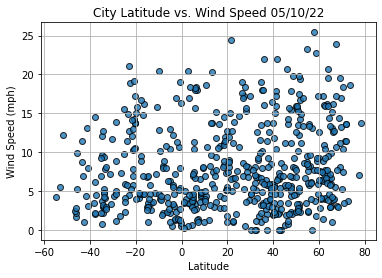

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()